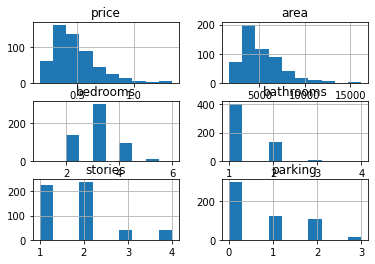

In [4]:
import pandas as pd
url='Housing.csv'
data=pd.read_csv(url)
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [5]:
correlation=data.corr()
print(correlation)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<Axes: >

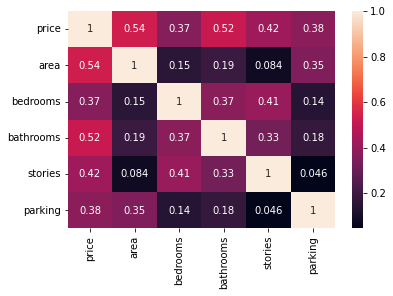

In [6]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price', ylabel='area'>

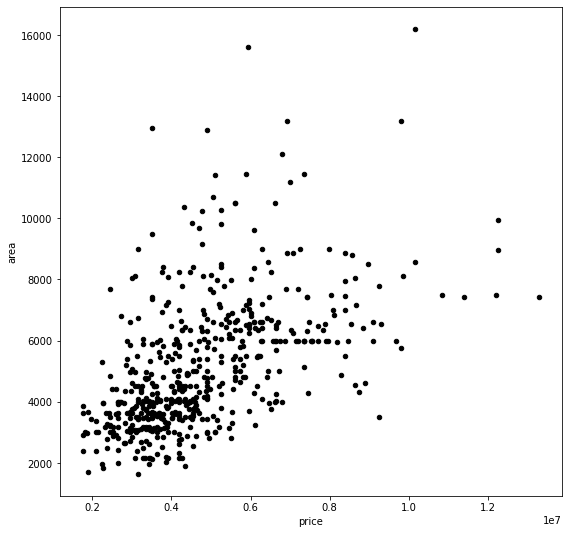

In [8]:
data.plot(kind='scatter',x='price',y='area',figsize=(9,9),color='black')

In [9]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['price']),y=data['area'])
print(model.intercept_)
print(model.coef_)
model.score(X=pd.DataFrame(data['price']),y=data['area'])

2186.2055595366696
[0.00062188]


0.2872931546811469

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


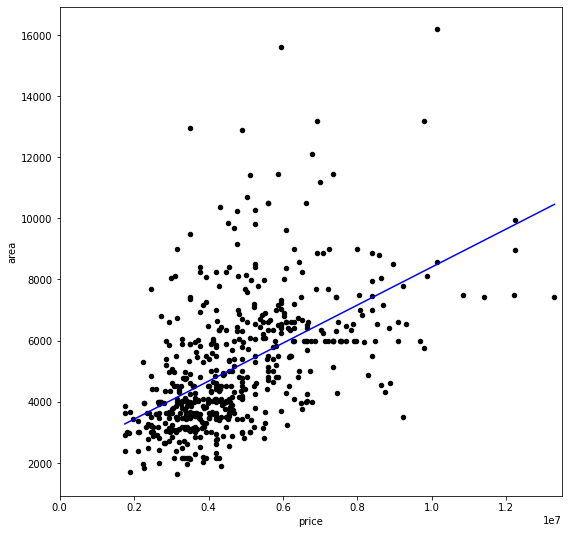

In [13]:
data.plot(kind='scatter',x='price',y='area',figsize=(9,9),color='black',xlim=(0,13500000))
y_pred=model.predict(X=pd.DataFrame(data['price']))
plt.plot(data['price'],y_pred,color='blue')

In [20]:
model=linear_model.LinearRegression()

model.fit(X=pd.DataFrame([data['price'],data['price']**2,data['price']**3,data['price']**4,data['price']**5,data['price']**6,data['price']**7,data['price']**8,data['price']**9,data['price']**10]).T,y=data['area'])
print('Intercept of model:',model.intercept_)
print('Coefient of model:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=pd.DataFrame([data['price'],data['price']**2,data['price']**3,data['price']**4,data['price']**5,data['price']**6,data['price']**7,data['price']**8,data['price']**9,data['price']**20]).T,y=data['area']))

Intercept of model: 939.0689121643845
Coefient of model: [ 1.13394721e-03 -4.47745266e-11 -6.04763124e-18  1.07267045e-17
 -1.21366816e-17 -4.03343632e-19  3.47116509e-17 -1.07416007e-17
  1.79172578e-17  1.40674414e-17]
Độ chính xác của mô hình: 0.30689404544107546


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


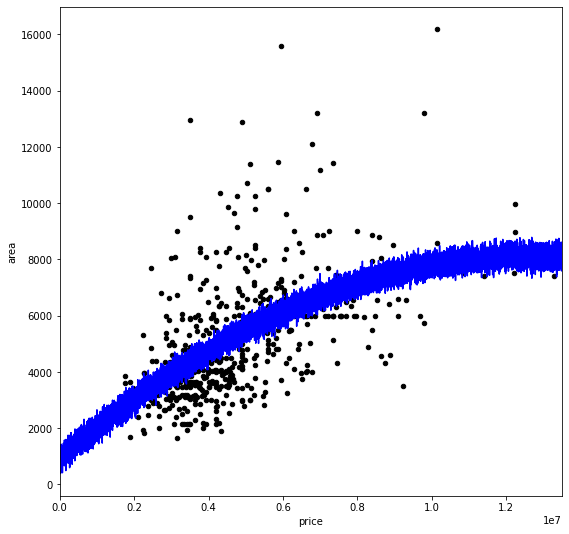

In [24]:
import numpy as np
range=np.arange(0,13500000,1000)

predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X=predictor)
data.plot(kind='scatter',x='price',y='area',figsize=(9,9),color='black',xlim=(0,13500000))
plt.plot(range,y_pred,color='blue')